# Taller 1 - MLP para Regresión para Regresión

Profesor: Dr. Ing. Rodrigo Salas, Universidad de Valparaíso

[rodrigo.salas@uv.cl](mailto:rodrigo.salas@uv.cl)

Cursillo de Deep Learning aplicado a Imágenes

**Simposio Internacional de Estadística 2025**

**Pasto, Colombia**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

### Gráfica de la Función

Se desea aproximar la siguiente función nolineal $y=f(x_1,x_2) + \varepsilon$ utilizando el perceptrón multicapa.

$$ y = 3\cdot \exp\left(-\frac{x_1}{x_2}\right)\cdot \cos \left(\frac{(x_1-x_2)^2}{1000}\right) - 2\cdot \exp\left(-\frac{x_1-x_2+100}{100}\right)\cdot \sin \left(\frac{x_1}{x_2}\right) + \varepsilon$$

donde $\varepsilon \sim \cal{N}(0,\sigma_\varepsilon^2)$

Generación de los datos en una grilla discreta en el rango $[0,100]\times [50,120]$. Se considera un ruido gaussiano i.i.d para el término $\varepsilon$ con media $0$ y desviación estándar $\varepsilon=0.5$.

In [ ]:
X1 = np.arange(0, 100, 1)
X2 = np.arange(50, 120, 1)
X1, X2 = np.meshgrid(X1, X2)
e = np.random.normal(0,0.5,(70,100))
Y = 3*np.exp(-(X1/X2))*np.cos((X1-X2)**2/1000)  - 2*np.exp(-(X1-X2+100)/100)*np.sin(X1/X2)+e

Se grafica la función como una superficie 3D

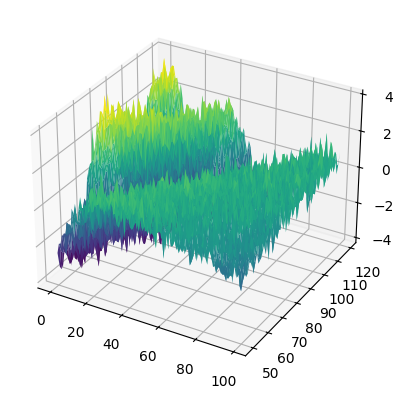

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax=fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=cm.viridis)

### Generación de datos Sintéticos

Se generan 10000 datos sintéticos con distribución uniforme para $x_1$ y $x_2$ en los rangos $[0,100]$ y $[50,120]$, respectivamente.

In [ ]:
x1 = np.random.uniform(0,100,10000)
x2 = np.random.uniform(50,120,10000)
e = np.random.normal(0,0.5,10000)
y = 3*np.exp(-(x1/x2))*np.cos((x1-x2)**2/1000) - 2*np.exp(-(x1-x2+100)/100)*np.sin(x1/x2)+e

Se unen las componentes $x_1$ y $x_2$ en una matriz $X$ de dimensión $n\times 2$, donde las filas corresponden a las muestras, y las columnas a las variables (features).

In [ ]:
X = np.vstack((x1,x2)).T
X

array([[ 97.7768209 , 118.76711852],
       [ 88.37471558, 118.55391533],
       [ 81.32445186, 111.9211378 ],
       ...,
       [ 35.6155062 ,  51.37459947],
       [ 89.16389885, 119.26794911],
       [ 78.04319467,  51.03041173]])

### Preprocesamiento de los datos

Se procede a realizar un re-escalamiento de los Datos utilizando la función *MinMaxScaler*, el cual escala cada columna al rango $[0,1]$:

$$z_i^{(j)} = \frac{x_i^{(j)}-\min\{x^{(j)}\}}{\max\{x^{(j)}\}-\min\{x^{(j)}\}}$$

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
Z = scaler.fit_transform(X)

### Separación en conjunto de Entrenamiento y Test

El conjunto de datos se separa en un conjunto de entrenamiento utilizado para ajustar el modelo de Red Neuronal Artificial, y otro de Test y utilizado para evaluar la capacidad de generalización.

En este caso utilizaremos el $70\%$ de los datos para entrenamiento y el $30\%% para test.

In [ ]:
Z_train, Z_test, y_train, y_test = train_test_split(Z,y,test_size=0.3)

### Creación del Perceptrón Multicapa

Se creará un modelo de Perceptron multicapa que consiste en:
- Una capa de entrada con 2 unidades
- Una capa escondidad con 100 unidades y función de activación sigmoidea o también conocidad como logística.
- Una capa escondidad con 20 unidades y función de activación sigmoidea o también conocidad como logística.
- Una capa de salida con 1 neurona con función de activación lineal

El total de parámetros a ajustar es de 2341.

La función de pérdida que se utilizará para entrenar es el *Error Cuadrático Medio*:

$$\mathcal{L}(y,\hat{y})= \sum_{i=1}^n (y_i-\hat{y_i})^2$$

El algoritmo de entrenamiento de tipo backpropagation que se utilizará es el *ADAM*



In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer='adam', metrics=['mean_squared_error'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,341 (9.14 KB)

 Trainable params: 2,341 (9.14 KB)

 Non-trainable params: 0 (0.00 B)

### Ajuste de la Red Neuronal Artificial

Con el fin de evitar el fenómeno del sobreajuster de la Red Neuronal Artificial, aplicaremos parada temprana con el criterio de si no se mejora el desempeño en 5 epocas, entonces se detiene el proceso

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

Además se almacenará en un archivo el mejor modelo encontrado durante el entrenamiento.

In [ ]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

Utilizamos la función *fit()* para entrenar el modelo. Se consideran un máximo de 1000 épocas con batch de tamaño 20. Además el conjunto de entrenamiento se divide en conjunto de ajuste($70%$) y validación ($30%$).

In [ ]:
history = model.fit(Z_train, y_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es,mc])

Epoch 1/1000
223/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9868 - mean_squared_error: 1.9868
Epoch 1: val_loss improved from inf to 1.79088, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9804 - mean_squared_error: 1.9804 - val_loss: 1.7909 - val_mean_squared_error: 1.7909
Epoch 2/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8417 - mean_squared_error: 1.8417
Epoch 2: val_loss improved from 1.79088 to 1.77724, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8430 - mean_squared_error: 1.8430 - val_loss: 1.7772 - val_mean_squared_error: 1.7772
Epoch 3/1000
223/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8336 - mean_squared_error: 1.8336
Epoch 3: val_loss improved from 1.77724 to 1.74030, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8346 - mean_squared_error: 1.8346 - val_loss: 1.7403 - val_mean_squared_error: 1.7403
Epoch 4/1000
231/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7703 - mean_squared_error: 1.7703
Epoch 4: val_loss improved from 1.74030 to 1.71067, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7731 - mean_squared_error: 1.7731 - val_loss: 1.7107 - val_mean_squared_error: 1.7107
Epoch 5/1000
236/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7755 - mean_squared_error: 1.7755
Epoch 5: val_loss improved from 1.71067 to 1.69793, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7764 - mean_squared_error: 1.7764 - val_loss: 1.6979 - val_mean_squared_error: 1.6979
Epoch 6/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8000 - mean_squared_error: 1.8000
Epoch 6: val_loss did not improve from 1.69793
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7998 - mean_squared_error: 1.7998 - val_loss: 1.7360 - val_mean_squared_error: 1.7360
Epoch 7/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8514 - mean_squared_error: 1.8514
Epoch 7: val_loss improved from 1.69793 to 1.69554, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8506 - mean_squared_error: 1.8506 - val_loss: 1.6955 - val_mean_squared_error: 1.6955
Epoch 8/1000
223/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7744 - mean_squared_error: 1.7744
Epoch 8: val_loss improved from 1.69554 to 1.67871, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7746 - mean_squared_error: 1.7746 - val_loss: 1.6787 - val_mean_squared_error: 1.6787
Epoch 9/1000
225/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7940 - mean_squared_error: 1.7940
Epoch 9: val_loss did not improve from 1.67871
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7938 - mean_squared_error: 1.7938 - val_loss: 1.6963 - val_mean_squared_error: 1.6963
Epoch 10/1000
230/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7767 - mean_squared_error: 1.7767
Epoch 10: val_loss did not improve from 1.67871
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7773 - mean_squared_error: 1.7773 - val_loss: 1.6830 - val_mean_squared_error: 1.6830
Epoch 11/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7987 - mean_squared_error: 1.7987
Epoch 11: val_loss did not improve from 1.67871
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7978 - mean_squared_error: 1.7978 - val_loss: 1.6817 - val_mean_squared_error: 1.6817
Epoch 12/1000

245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7439 - mean_squared_error: 1.7439 - val_loss: 1.6764 - val_mean_squared_error: 1.6764
Epoch 14/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7739 - mean_squared_error: 1.7739
Epoch 14: val_loss did not improve from 1.67637
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7741 - mean_squared_error: 1.7741 - val_loss: 1.6878 - val_mean_squared_error: 1.6878
Epoch 15/1000
238/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7708 - mean_squared_error: 1.7708
Epoch 15: val_loss improved from 1.67637 to 1.67467, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7710 - mean_squared_error: 1.7710 - val_loss: 1.6747 - val_mean_squared_error: 1.6747
Epoch 16/1000
225/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7597 - mean_squared_error: 1.7597
Epoch 16: val_loss did not improve from 1.67467
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7609 - mean_squared_error: 1.7609 - val_loss: 1.6847 - val_mean_squared_error: 1.6847
Epoch 17/1000
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7582 - mean_squared_error: 1.7582
Epoch 17: val_loss improved from 1.67467 to 1.67300, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7585 - mean_squared_error: 1.7585 - val_loss: 1.6730 - val_mean_squared_error: 1.6730
Epoch 18/1000
222/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7644 - mean_squared_error: 1.7644
Epoch 18: val_loss did not improve from 1.67300
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7654 - mean_squared_error: 1.7654 - val_loss: 1.6770 - val_mean_squared_error: 1.6770
Epoch 19/1000
237/245 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7940 - mean_squared_error: 1.7940
Epoch 19: val_loss improved from 1.67300 to 1.67291, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7931 - mean_squared_error: 1.7931 - val_loss: 1.6729 - val_mean_squared_error: 1.6729
Epoch 20/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7714 - mean_squared_error: 1.7714
Epoch 20: val_loss improved from 1.67291 to 1.67078, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7715 - mean_squared_error: 1.7715 - val_loss: 1.6708 - val_mean_squared_error: 1.6708
Epoch 21/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7800 - mean_squared_error: 1.7800
Epoch 21: val_loss did not improve from 1.67078
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7793 - mean_squared_error: 1.7793 - val_loss: 1.6712 - val_mean_squared_error: 1.6712
Epoch 22/1000
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7902 - mean_squared_error: 1.7902
Epoch 22: val_loss did not improve from 1.67078
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7901 - mean_squared_error: 1.7901 - val_loss: 1.6751 - val_mean_squared_error: 1.6751
Epoch 23/1000
222/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7549 - mean_squared_error: 1.7549
Epoch 23: val_loss improved from 1.67078 to 1.66836, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7564 - mean_squared_error: 1.7564 - val_loss: 1.6684 - val_mean_squared_error: 1.6684
Epoch 24/1000
229/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7168 - mean_squared_error: 1.7168
Epoch 24: val_loss improved from 1.66836 to 1.66511, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7199 - mean_squared_error: 1.7199 - val_loss: 1.6651 - val_mean_squared_error: 1.6651
Epoch 25/1000
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7754 - mean_squared_error: 1.7754
Epoch 25: val_loss did not improve from 1.66511
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7753 - mean_squared_error: 1.7753 - val_loss: 1.6693 - val_mean_squared_error: 1.6693
Epoch 26/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7685 - mean_squared_error: 1.7685
Epoch 26: val_loss did not improve from 1.66511
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7685 - mean_squared_error: 1.7685 - val_loss: 1.6680 - val_mean_squared_error: 1.6680
Epoch 27/1000
221/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7199 - mean_squared_error: 1.7199
Epoch 27: val_loss improved from 1.66511 to 1.65794, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7244 - mean_squared_error: 1.7244 - val_loss: 1.6579 - val_mean_squared_error: 1.6579
Epoch 28/1000
236/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7581 - mean_squared_error: 1.7581
Epoch 28: val_loss did not improve from 1.65794
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7580 - mean_squared_error: 1.7580 - val_loss: 1.6643 - val_mean_squared_error: 1.6643
Epoch 29/1000
235/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7712 - mean_squared_error: 1.7712
Epoch 29: val_loss improved from 1.65794 to 1.64413, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7699 - mean_squared_error: 1.7699 - val_loss: 1.6441 - val_mean_squared_error: 1.6441
Epoch 30/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7918 - mean_squared_error: 1.7918
Epoch 30: val_loss improved from 1.64413 to 1.64218, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7894 - mean_squared_error: 1.7894 - val_loss: 1.6422 - val_mean_squared_error: 1.6422
Epoch 31/1000
238/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7762 - mean_squared_error: 1.7762
Epoch 31: val_loss improved from 1.64218 to 1.62299, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7746 - mean_squared_error: 1.7746 - val_loss: 1.6230 - val_mean_squared_error: 1.6230
Epoch 32/1000
223/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7467 - mean_squared_error: 1.7467
Epoch 32: val_loss improved from 1.62299 to 1.60297, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7434 - mean_squared_error: 1.7434 - val_loss: 1.6030 - val_mean_squared_error: 1.6030
Epoch 33/1000
235/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7089 - mean_squared_error: 1.7089
Epoch 33: val_loss improved from 1.60297 to 1.58004, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7080 - mean_squared_error: 1.7080 - val_loss: 1.5800 - val_mean_squared_error: 1.5800
Epoch 34/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7066 - mean_squared_error: 1.7066
Epoch 34: val_loss improved from 1.58004 to 1.54966, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7057 - mean_squared_error: 1.7057 - val_loss: 1.5497 - val_mean_squared_error: 1.5497
Epoch 35/1000
232/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6495 - mean_squared_error: 1.6495
Epoch 35: val_loss improved from 1.54966 to 1.51287, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6484 - mean_squared_error: 1.6484 - val_loss: 1.5129 - val_mean_squared_error: 1.5129
Epoch 36/1000
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6248 - mean_squared_error: 1.6248
Epoch 36: val_loss improved from 1.51287 to 1.46677, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6246 - mean_squared_error: 1.6246 - val_loss: 1.4668 - val_mean_squared_error: 1.4668
Epoch 37/1000
231/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5904 - mean_squared_error: 1.5904
Epoch 37: val_loss improved from 1.46677 to 1.41623, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5884 - mean_squared_error: 1.5884 - val_loss: 1.4162 - val_mean_squared_error: 1.4162
Epoch 38/1000
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5218 - mean_squared_error: 1.5218
Epoch 38: val_loss improved from 1.41623 to 1.36190, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5213 - mean_squared_error: 1.5213 - val_loss: 1.3619 - val_mean_squared_error: 1.3619
Epoch 39/1000
238/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4351 - mean_squared_error: 1.4351
Epoch 39: val_loss improved from 1.36190 to 1.29709, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4347 - mean_squared_error: 1.4347 - val_loss: 1.2971 - val_mean_squared_error: 1.2971
Epoch 40/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3613 - mean_squared_error: 1.3613
Epoch 40: val_loss improved from 1.29709 to 1.22505, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3611 - mean_squared_error: 1.3611 - val_loss: 1.2250 - val_mean_squared_error: 1.2250
Epoch 41/1000
233/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3031 - mean_squared_error: 1.3031
Epoch 41: val_loss improved from 1.22505 to 1.16601, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3020 - mean_squared_error: 1.3020 - val_loss: 1.1660 - val_mean_squared_error: 1.1660
Epoch 42/1000
237/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2461 - mean_squared_error: 1.2461
Epoch 42: val_loss improved from 1.16601 to 1.10661, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2449 - mean_squared_error: 1.2449 - val_loss: 1.1066 - val_mean_squared_error: 1.1066
Epoch 43/1000
238/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1615 - mean_squared_error: 1.1615
Epoch 43: val_loss improved from 1.10661 to 1.04414, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1612 - mean_squared_error: 1.1612 - val_loss: 1.0441 - val_mean_squared_error: 1.0441
Epoch 44/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1482 - mean_squared_error: 1.1482
Epoch 44: val_loss improved from 1.04414 to 0.99912, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1475 - mean_squared_error: 1.1475 - val_loss: 0.9991 - val_mean_squared_error: 0.9991
Epoch 45/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0659 - mean_squared_error: 1.0659
Epoch 45: val_loss improved from 0.99912 to 0.97531, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0643 - mean_squared_error: 1.0643 - val_loss: 0.9753 - val_mean_squared_error: 0.9753
Epoch 46/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0293 - mean_squared_error: 1.0293
Epoch 46: val_loss improved from 0.97531 to 0.92376, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0287 - mean_squared_error: 1.0287 - val_loss: 0.9238 - val_mean_squared_error: 0.9238
Epoch 47/1000
223/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9635 - mean_squared_error: 0.9635
Epoch 47: val_loss improved from 0.92376 to 0.89543, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9639 - mean_squared_error: 0.9639 - val_loss: 0.8954 - val_mean_squared_error: 0.8954
Epoch 48/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9111 - mean_squared_error: 0.9111
Epoch 48: val_loss improved from 0.89543 to 0.87048, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9119 - mean_squared_error: 0.9119 - val_loss: 0.8705 - val_mean_squared_error: 0.8705
Epoch 49/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8624 - mean_squared_error: 0.8624
Epoch 49: val_loss improved from 0.87048 to 0.85086, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8637 - mean_squared_error: 0.8637 - val_loss: 0.8509 - val_mean_squared_error: 0.8509
Epoch 50/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9165 - mean_squared_error: 0.9165
Epoch 50: val_loss improved from 0.85086 to 0.83723, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9162 - mean_squared_error: 0.9162 - val_loss: 0.8372 - val_mean_squared_error: 0.8372
Epoch 51/1000
232/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9093 - mean_squared_error: 0.9093
Epoch 51: val_loss improved from 0.83723 to 0.82156, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9079 - mean_squared_error: 0.9079 - val_loss: 0.8216 - val_mean_squared_error: 0.8216
Epoch 52/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9371 - mean_squared_error: 0.9371
Epoch 52: val_loss improved from 0.82156 to 0.81378, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9354 - mean_squared_error: 0.9354 - val_loss: 0.8138 - val_mean_squared_error: 0.8138
Epoch 53/1000
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8671 - mean_squared_error: 0.8671
Epoch 53: val_loss improved from 0.81378 to 0.80176, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8671 - mean_squared_error: 0.8671 - val_loss: 0.8018 - val_mean_squared_error: 0.8018
Epoch 54/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8374 - mean_squared_error: 0.8374
Epoch 54: val_loss improved from 0.80176 to 0.79352, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8375 - mean_squared_error: 0.8375 - val_loss: 0.7935 - val_mean_squared_error: 0.7935
Epoch 55/1000
224/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8032 - mean_squared_error: 0.8032
Epoch 55: val_loss improved from 0.79352 to 0.78853, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8064 - mean_squared_error: 0.8064 - val_loss: 0.7885 - val_mean_squared_error: 0.7885
Epoch 56/1000
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8076 - mean_squared_error: 0.8076
Epoch 56: val_loss improved from 0.78853 to 0.78273, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8078 - mean_squared_error: 0.8078 - val_loss: 0.7827 - val_mean_squared_error: 0.7827
Epoch 57/1000
237/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8628 - mean_squared_error: 0.8628
Epoch 57: val_loss improved from 0.78273 to 0.77524, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8615 - mean_squared_error: 0.8615 - val_loss: 0.7752 - val_mean_squared_error: 0.7752
Epoch 58/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8106 - mean_squared_error: 0.8106
Epoch 58: val_loss improved from 0.77524 to 0.76818, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8107 - mean_squared_error: 0.8107 - val_loss: 0.7682 - val_mean_squared_error: 0.7682
Epoch 59/1000
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8108 - mean_squared_error: 0.8108
Epoch 59: val_loss improved from 0.76818 to 0.75963, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8108 - mean_squared_error: 0.8108 - val_loss: 0.7596 - val_mean_squared_error: 0.7596
Epoch 60/1000
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8039 - mean_squared_error: 0.8039
Epoch 60: val_loss improved from 0.75963 to 0.74790, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8038 - mean_squared_error: 0.8038 - val_loss: 0.7479 - val_mean_squared_error: 0.7479
Epoch 61/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7738 - mean_squared_error: 0.7738
Epoch 61: val_loss improved from 0.74790 to 0.74063, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7740 - mean_squared_error: 0.7740 - val_loss: 0.7406 - val_mean_squared_error: 0.7406
Epoch 62/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7138 - mean_squared_error: 0.7138
Epoch 62: val_loss improved from 0.74063 to 0.72266, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7154 - mean_squared_error: 0.7154 - val_loss: 0.7227 - val_mean_squared_error: 0.7227
Epoch 63/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7104 - mean_squared_error: 0.7104
Epoch 63: val_loss improved from 0.72266 to 0.70727, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7133 - mean_squared_error: 0.7133 - val_loss: 0.7073 - val_mean_squared_error: 0.7073
Epoch 64/1000
233/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7655 - mean_squared_error: 0.7655
Epoch 64: val_loss improved from 0.70727 to 0.69628, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7642 - mean_squared_error: 0.7642 - val_loss: 0.6963 - val_mean_squared_error: 0.6963
Epoch 65/1000
217/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7316 - mean_squared_error: 0.7316
Epoch 65: val_loss improved from 0.69628 to 0.68215, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7307 - mean_squared_error: 0.7307 - val_loss: 0.6822 - val_mean_squared_error: 0.6822
Epoch 66/1000
238/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6787 - mean_squared_error: 0.6787
Epoch 66: val_loss improved from 0.68215 to 0.66747, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6796 - mean_squared_error: 0.6796 - val_loss: 0.6675 - val_mean_squared_error: 0.6675
Epoch 67/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6988 - mean_squared_error: 0.6988
Epoch 67: val_loss improved from 0.66747 to 0.65446, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6987 - mean_squared_error: 0.6987 - val_loss: 0.6545 - val_mean_squared_error: 0.6545
Epoch 68/1000
225/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6869 - mean_squared_error: 0.6869
Epoch 68: val_loss improved from 0.65446 to 0.65168, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6855 - mean_squared_error: 0.6855 - val_loss: 0.6517 - val_mean_squared_error: 0.6517
Epoch 69/1000
232/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6605 - mean_squared_error: 0.6605
Epoch 69: val_loss improved from 0.65168 to 0.63621, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6607 - mean_squared_error: 0.6607 - val_loss: 0.6362 - val_mean_squared_error: 0.6362
Epoch 70/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6759 - mean_squared_error: 0.6759
Epoch 70: val_loss improved from 0.63621 to 0.62017, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6753 - mean_squared_error: 0.6753 - val_loss: 0.6202 - val_mean_squared_error: 0.6202
Epoch 71/1000
238/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6360 - mean_squared_error: 0.6360
Epoch 71: val_loss improved from 0.62017 to 0.61624, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6361 - mean_squared_error: 0.6361 - val_loss: 0.6162 - val_mean_squared_error: 0.6162
Epoch 72/1000
235/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6656 - mean_squared_error: 0.6656
Epoch 72: val_loss improved from 0.61624 to 0.60583, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6640 - mean_squared_error: 0.6640 - val_loss: 0.6058 - val_mean_squared_error: 0.6058
Epoch 73/1000
229/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6330 - mean_squared_error: 0.6330
Epoch 73: val_loss improved from 0.60583 to 0.58865, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6320 - mean_squared_error: 0.6320 - val_loss: 0.5887 - val_mean_squared_error: 0.5887
Epoch 74/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6438 - mean_squared_error: 0.6438
Epoch 74: val_loss improved from 0.58865 to 0.58279, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6415 - mean_squared_error: 0.6415 - val_loss: 0.5828 - val_mean_squared_error: 0.5828
Epoch 75/1000
232/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6031 - mean_squared_error: 0.6031
Epoch 75: val_loss improved from 0.58279 to 0.57588, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6027 - mean_squared_error: 0.6027 - val_loss: 0.5759 - val_mean_squared_error: 0.5759
Epoch 76/1000
226/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6304 - mean_squared_error: 0.6304
Epoch 76: val_loss improved from 0.57588 to 0.56827, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6271 - mean_squared_error: 0.6271 - val_loss: 0.5683 - val_mean_squared_error: 0.5683
Epoch 77/1000
236/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5890 - mean_squared_error: 0.5890
Epoch 77: val_loss improved from 0.56827 to 0.56000, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5887 - mean_squared_error: 0.5887 - val_loss: 0.5600 - val_mean_squared_error: 0.5600
Epoch 78/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5757 - mean_squared_error: 0.5757
Epoch 78: val_loss improved from 0.56000 to 0.55202, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5757 - mean_squared_error: 0.5757 - val_loss: 0.5520 - val_mean_squared_error: 0.5520
Epoch 79/1000
229/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5658 - mean_squared_error: 0.5658
Epoch 79: val_loss improved from 0.55202 to 0.54659, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5663 - mean_squared_error: 0.5663 - val_loss: 0.5466 - val_mean_squared_error: 0.5466
Epoch 80/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5579 - mean_squared_error: 0.5579
Epoch 80: val_loss did not improve from 0.54659
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5581 - mean_squared_error: 0.5581 - val_loss: 0.5475 - val_mean_squared_error: 0.5475
Epoch 81/1000
237/245 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5730 - mean_squared_error: 0.5730
Epoch 81: val_loss improved from 0.54659 to 0.53830, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5723 - mean_squared_error: 0.5723 - val_loss: 0.5383 - val_mean_squared_error: 0.5383
Epoch 82/1000
230/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5552 - mean_squared_error: 0.5552
Epoch 82: val_loss improved from 0.53830 to 0.53249, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5550 - mean_squared_error: 0.5550 - val_loss: 0.5325 - val_mean_squared_error: 0.5325
Epoch 83/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5553 - mean_squared_error: 0.5553
Epoch 83: val_loss improved from 0.53249 to 0.52943, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5546 - mean_squared_error: 0.5546 - val_loss: 0.5294 - val_mean_squared_error: 0.5294
Epoch 84/1000
232/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5537 - mean_squared_error: 0.5537
Epoch 84: val_loss improved from 0.52943 to 0.52527, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5532 - mean_squared_error: 0.5532 - val_loss: 0.5253 - val_mean_squared_error: 0.5253
Epoch 85/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5235 - mean_squared_error: 0.5235
Epoch 85: val_loss improved from 0.52527 to 0.52101, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5243 - mean_squared_error: 0.5243 - val_loss: 0.5210 - val_mean_squared_error: 0.5210
Epoch 86/1000
224/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5133 - mean_squared_error: 0.5133
Epoch 86: val_loss improved from 0.52101 to 0.52071, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5147 - mean_squared_error: 0.5147 - val_loss: 0.5207 - val_mean_squared_error: 0.5207
Epoch 87/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5106 - mean_squared_error: 0.5106
Epoch 87: val_loss improved from 0.52071 to 0.51130, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5118 - mean_squared_error: 0.5118 - val_loss: 0.5113 - val_mean_squared_error: 0.5113
Epoch 88/1000
229/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5371 - mean_squared_error: 0.5371
Epoch 88: val_loss improved from 0.51130 to 0.50947, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5363 - mean_squared_error: 0.5363 - val_loss: 0.5095 - val_mean_squared_error: 0.5095
Epoch 89/1000
230/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4938 - mean_squared_error: 0.4938
Epoch 89: val_loss improved from 0.50947 to 0.49824, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4951 - mean_squared_error: 0.4951 - val_loss: 0.4982 - val_mean_squared_error: 0.4982
Epoch 90/1000
237/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5124 - mean_squared_error: 0.5124
Epoch 90: val_loss improved from 0.49824 to 0.49259, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5122 - mean_squared_error: 0.5122 - val_loss: 0.4926 - val_mean_squared_error: 0.4926
Epoch 91/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5041 - mean_squared_error: 0.5041
Epoch 91: val_loss improved from 0.49259 to 0.48391, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5039 - mean_squared_error: 0.5039 - val_loss: 0.4839 - val_mean_squared_error: 0.4839
Epoch 92/1000
229/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4650 - mean_squared_error: 0.4650
Epoch 92: val_loss improved from 0.48391 to 0.47228, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4665 - mean_squared_error: 0.4665 - val_loss: 0.4723 - val_mean_squared_error: 0.4723
Epoch 93/1000
235/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4865 - mean_squared_error: 0.4865
Epoch 93: val_loss improved from 0.47228 to 0.46239, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4859 - mean_squared_error: 0.4859 - val_loss: 0.4624 - val_mean_squared_error: 0.4624
Epoch 94/1000
226/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4653 - mean_squared_error: 0.4653
Epoch 94: val_loss improved from 0.46239 to 0.44978, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4654 - mean_squared_error: 0.4654 - val_loss: 0.4498 - val_mean_squared_error: 0.4498
Epoch 95/1000
226/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4616 - mean_squared_error: 0.4616
Epoch 95: val_loss improved from 0.44978 to 0.43295, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4612 - mean_squared_error: 0.4612 - val_loss: 0.4329 - val_mean_squared_error: 0.4329
Epoch 96/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4209 - mean_squared_error: 0.4209
Epoch 96: val_loss improved from 0.43295 to 0.41828, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4224 - mean_squared_error: 0.4224 - val_loss: 0.4183 - val_mean_squared_error: 0.4183
Epoch 97/1000
238/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3948 - mean_squared_error: 0.3948
Epoch 97: val_loss improved from 0.41828 to 0.41335, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3960 - mean_squared_error: 0.3960 - val_loss: 0.4134 - val_mean_squared_error: 0.4134
Epoch 98/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4290 - mean_squared_error: 0.4290
Epoch 98: val_loss improved from 0.41335 to 0.39752, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4280 - mean_squared_error: 0.4280 - val_loss: 0.3975 - val_mean_squared_error: 0.3975
Epoch 99/1000
236/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3826 - mean_squared_error: 0.3826
Epoch 99: val_loss improved from 0.39752 to 0.38881, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3836 - mean_squared_error: 0.3836 - val_loss: 0.3888 - val_mean_squared_error: 0.3888
Epoch 100/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3900 - mean_squared_error: 0.3900
Epoch 100: val_loss improved from 0.38881 to 0.37490, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3900 - mean_squared_error: 0.3900 - val_loss: 0.3749 - val_mean_squared_error: 0.3749
Epoch 101/1000
226/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3798 - mean_squared_error: 0.3798
Epoch 101: val_loss improved from 0.37490 to 0.37062, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3802 - mean_squared_error: 0.3802 - val_loss: 0.3706 - val_mean_squared_error: 0.3706
Epoch 102/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3791 - mean_squared_error: 0.3791
Epoch 102: val_loss improved from 0.37062 to 0.35396, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3789 - mean_squared_error: 0.3789 - val_loss: 0.3540 - val_mean_squared_error: 0.3540
Epoch 103/1000
233/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3602 - mean_squared_error: 0.3602
Epoch 103: val_loss improved from 0.35396 to 0.35185, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3603 - mean_squared_error: 0.3603 - val_loss: 0.3519 - val_mean_squared_error: 0.3519
Epoch 104/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3635 - mean_squared_error: 0.3635
Epoch 104: val_loss improved from 0.35185 to 0.34373, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3629 - mean_squared_error: 0.3629 - val_loss: 0.3437 - val_mean_squared_error: 0.3437
Epoch 105/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3359 - mean_squared_error: 0.3359
Epoch 105: val_loss improved from 0.34373 to 0.32773, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3362 - mean_squared_error: 0.3362 - val_loss: 0.3277 - val_mean_squared_error: 0.3277
Epoch 106/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3443 - mean_squared_error: 0.3443
Epoch 106: val_loss improved from 0.32773 to 0.32466, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3438 - mean_squared_error: 0.3438 - val_loss: 0.3247 - val_mean_squared_error: 0.3247
Epoch 107/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3322 - mean_squared_error: 0.3322
Epoch 107: val_loss improved from 0.32466 to 0.31684, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3318 - mean_squared_error: 0.3318 - val_loss: 0.3168 - val_mean_squared_error: 0.3168
Epoch 108/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3156 - mean_squared_error: 0.3156
Epoch 108: val_loss improved from 0.31684 to 0.30755, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3157 - mean_squared_error: 0.3157 - val_loss: 0.3076 - val_mean_squared_error: 0.3076
Epoch 109/1000
223/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3273 - mean_squared_error: 0.3273
Epoch 109: val_loss improved from 0.30755 to 0.30287, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3260 - mean_squared_error: 0.3260 - val_loss: 0.3029 - val_mean_squared_error: 0.3029
Epoch 110/1000
220/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3143 - mean_squared_error: 0.3143
Epoch 110: val_loss improved from 0.30287 to 0.30049, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3138 - mean_squared_error: 0.3138 - val_loss: 0.3005 - val_mean_squared_error: 0.3005
Epoch 111/1000
237/245 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3140 - mean_squared_error: 0.3140
Epoch 111: val_loss improved from 0.30049 to 0.29503, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3137 - mean_squared_error: 0.3137 - val_loss: 0.2950 - val_mean_squared_error: 0.2950
Epoch 112/1000
226/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2917 - mean_squared_error: 0.2917
Epoch 112: val_loss improved from 0.29503 to 0.29314, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2925 - mean_squared_error: 0.2925 - val_loss: 0.2931 - val_mean_squared_error: 0.2931
Epoch 113/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2977 - mean_squared_error: 0.2977
Epoch 113: val_loss improved from 0.29314 to 0.28901, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2975 - mean_squared_error: 0.2975 - val_loss: 0.2890 - val_mean_squared_error: 0.2890
Epoch 114/1000
224/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2844 - mean_squared_error: 0.2844
Epoch 114: val_loss improved from 0.28901 to 0.28720, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2851 - mean_squared_error: 0.2851 - val_loss: 0.2872 - val_mean_squared_error: 0.2872
Epoch 115/1000
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2986 - mean_squared_error: 0.2986
Epoch 115: val_loss improved from 0.28720 to 0.28642, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2985 - mean_squared_error: 0.2985 - val_loss: 0.2864 - val_mean_squared_error: 0.2864
Epoch 116/1000
232/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2865 - mean_squared_error: 0.2865
Epoch 116: val_loss improved from 0.28642 to 0.28639, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2866 - mean_squared_error: 0.2866 - val_loss: 0.2864 - val_mean_squared_error: 0.2864
Epoch 117/1000
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2893 - mean_squared_error: 0.2893
Epoch 117: val_loss improved from 0.28639 to 0.28607, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2892 - mean_squared_error: 0.2892 - val_loss: 0.2861 - val_mean_squared_error: 0.2861
Epoch 118/1000
239/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2805 - mean_squared_error: 0.2805
Epoch 118: val_loss improved from 0.28607 to 0.28195, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2807 - mean_squared_error: 0.2807 - val_loss: 0.2819 - val_mean_squared_error: 0.2819
Epoch 119/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2753 - mean_squared_error: 0.2753
Epoch 119: val_loss improved from 0.28195 to 0.27999, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2759 - mean_squared_error: 0.2759 - val_loss: 0.2800 - val_mean_squared_error: 0.2800
Epoch 120/1000
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2760 - mean_squared_error: 0.2760
Epoch 120: val_loss did not improve from 0.27999
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2760 - mean_squared_error: 0.2760 - val_loss: 0.2876 - val_mean_squared_error: 0.2876
Epoch 121/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2865 - mean_squared_error: 0.2865
Epoch 121: val_loss improved from 0.27999 to 0.27761, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2861 - mean_squared_error: 0.2861 - val_loss: 0.2776 - val_mean_squared_error: 0.2776
Epoch 122/1000
233/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2692 - mean_squared_error: 0.2692
Epoch 122: val_loss improved from 0.27761 to 0.27553, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2697 - mean_squared_error: 0.2697 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 123/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2808 - mean_squared_error: 0.2808
Epoch 123: val_loss did not improve from 0.27553
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2807 - mean_squared_error: 0.2807 - val_loss: 0.2782 - val_mean_squared_error: 0.2782
Epoch 124/1000
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2693 - mean_squared_error: 0.2693
Epoch 124: val_loss improved from 0.27553 to 0.27301, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2694 - mean_squared_error: 0.2694 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 125/1000
232/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2720 - mean_squared_error: 0.2720
Epoch 125: val_loss did not improve from 0.27301
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2722 - mean_squared_error: 0.2722 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 126/1000
229/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2661 - mean_squared_error: 0.2661
Epoch 126: val_loss did not improve from 0.27301
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2667 - mean_squared_error: 0.2667 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 127/1000
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2832 - mean_squared_error: 0.2832
Epoch 127: val_loss improved from 0.27301 to 0.27301, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2830 - mean_squared_error: 0.2830 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 128/1000
230/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2801 - mean_squared_error: 0.2801
Epoch 128: val_loss improved from 0.27301 to 0.27262, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2796 - mean_squared_error: 0.2796 - val_loss: 0.2726 - val_mean_squared_error: 0.2726
Epoch 129/1000
230/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2779 - mean_squared_error: 0.2779
Epoch 129: val_loss did not improve from 0.27262
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2775 - mean_squared_error: 0.2775 - val_loss: 0.2743 - val_mean_squared_error: 0.2743
Epoch 130/1000
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2728 - mean_squared_error: 0.2728
Epoch 130: val_loss did not improve from 0.27262
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2727 - mean_squared_error: 0.2727 - val_loss: 0.2760 - val_mean_squared_error: 0.2760
Epoch 131/1000
228/245 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2706 - mean_squared_error: 0.2706
Epoch 131: val_loss improved from 0.27262 to 0.26988, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2705 - mean_squared_error: 0.2705 - val_loss: 0.2699 - val_mean_squared_error: 0.2699
Epoch 132/1000
227/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2714 - mean_squared_error: 0.2714
Epoch 132: val_loss improved from 0.26988 to 0.26885, saving model to best_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2714 - mean_squared_error: 0.2714 - val_loss: 0.2689 - val_mean_squared_error: 0.2689
Epoch 133/1000
231/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2673 - mean_squared_error: 0.2673
Epoch 133: val_loss did not improve from 0.26885
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2674 - mean_squared_error: 0.2674 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 134/1000
234/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2626 - mean_squared_error: 0.2626
Epoch 134: val_loss did not improve from 0.26885
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2629 - mean_squared_error: 0.2629 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 135/1000
229/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2699 - mean_squared_error: 0.2699
Epoch 135: val_loss did not improve from 0.26885
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2697 - mean_squared_error: 0.2697 - val_loss: 0.2705 - val_mean_squared_error: 0.2705
Epoch

Se recupera el mejor modelo obtenido durante el proceso de entrenamiento



In [ ]:
modelo = load_model('best_model.h5')

Graficamos la curva de aprendizaje

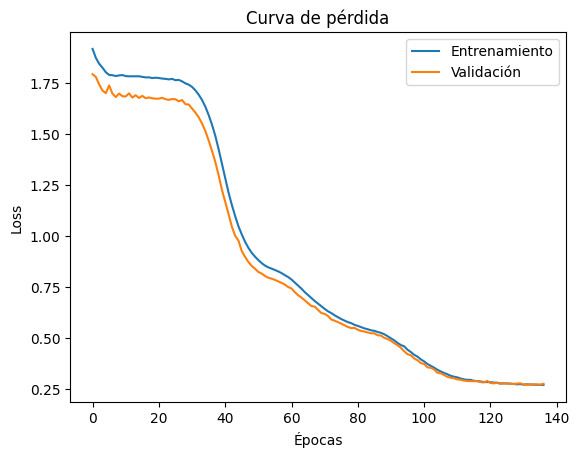

In [ ]:
train_loss = history.history['loss']               # Pérdida de entrenamiento
val_loss = history.history['val_loss']             # Pérdida de validación

plt.plot(train_loss, label='Entrenamiento')
plt.plot(val_loss, label='Validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

### Predicción de la Red Neuronal Artificial y Evaluación del Desempeño

Procedemos a obtener la predicción para el conjunto de entrenamiento para evaluar si logró aprender el conjunto de datos.

In [ ]:
y_predict = modelo.predict(Z_train)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Se grafica la predicción $\hat{y}$ vs el target $y$

Text(0, 0.5, 'x2')

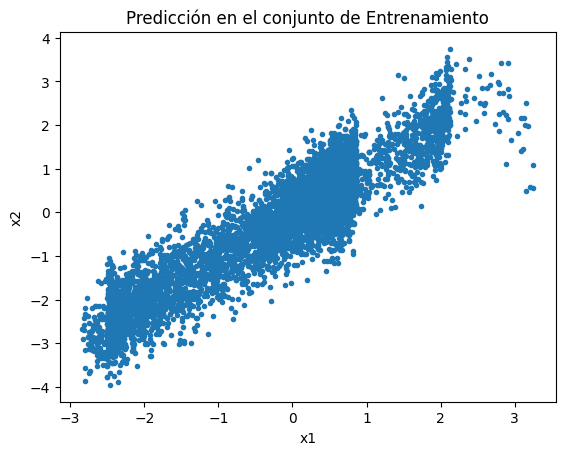

In [ ]:
plt.plot(y_predict,y_train,'.')
plt.title('Predicción en el conjunto de Entrenamiento')
plt.xlabel('x1')
plt.ylabel('x2')

In [ ]:
print('MSE:', mean_squared_error(y_train, y_predict))
print('R2:', r2_score(y_train, y_predict))

Procedemos a evaluar la capidad de generalización del modelo utilizando el conjunto de Test.

In [ ]:
y_predict_test = modelo.predict(Z_test)

In [ ]:
print('MSE:', mean_squared_error(y_test, y_predict_test))
print('R2:', r2_score(y_test, y_predict_test))

Text(0, 0.5, 'x2')

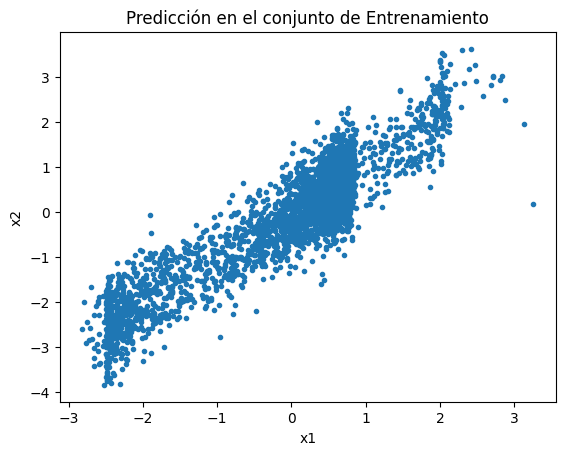

In [ ]:
plt.plot(y_predict_test,y_test,'.')
plt.title('Predicción en el conjunto de Test')
plt.xlabel('x1')
plt.ylabel('x2')

### Gráfica de la Predicción de la Red Neuronal Artificial

Graficaremos la predicción de la red neuronal artificial en una superficie 3D

In [ ]:
X1 = np.arange(0, 100, 1)
X2 = np.arange(50, 120, 1)
X1, X2 = np.meshgrid(X1, X2)
Y=np.zeros_like(X1).astype(float)
k=0
for (z1,z2) in zip(X1,X2):
    x = scaler.transform(np.vstack((z1,z2)).T)
    Y[k,:] =  modelo.predict(x).T
    k=k+1
fig = plt.figure()
ax = Axes3D(fig)
ax=fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap=cm.viridis)

**Muchas Gracias**